In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
# torch.manual_seed(2019)

In [2]:
data = np.linspace(1,100,100, dtype=np.float32)
noise = np.random.rand(100)
x_np = np.sin(data)
y_np = np.cos(data) 
y_np = y_np + noise
x = torch.from_numpy(x_np[:, np.newaxis, np.newaxis])  # 尺寸大小为(time_step, batch, input_size)
y = torch.from_numpy(y_np[:, np.newaxis, np.newaxis])
x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

C:\Users\XuYi\AppData\Local\Temp\ipykernel_18572\1434556254.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype = torch.float32)
C:\Users\XuYi\AppData\Local\Temp\ipykernel_18572\1434556254.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype = torch.float32)


In [3]:
y.shape

torch.Size([100, 1, 1])

In [5]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,  # RNN隐藏神经元个数
            num_layers=1,  # RNN隐藏层个数
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h):
        # x (time_step, batch_size, input_size)
        # h (n_layers, batch, hidden_size)
        # out (time_step, batch_size, hidden_size)
        out, h = self.rnn(x, h)
        prediction = self.out(out)
        return prediction, h

In [6]:
# 超参设置
TIME_STEP = 10  # RNN时间步长
INPUT_SIZE = 1  # RNN输入尺寸
INIT_LR = 0.02  # 初始学习率
N_EPOCHS = 100  # 训练回数

rnn = RNN()
optimizer = torch.optim.Adam(rnn.parameters(), lr=INIT_LR)
loss_func = nn.MSELoss()
h_state = None  # 初始化隐藏层

<Figure size 2160x720 with 0 Axes>

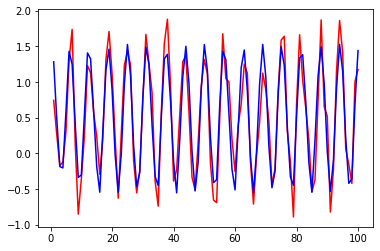

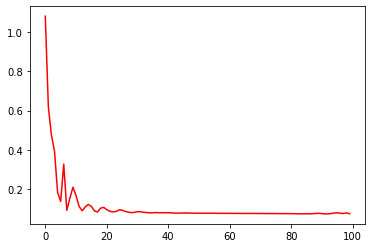

In [7]:
plt.figure(1, figsize=(30, 10))
loss_array = []
for step in range(N_EPOCHS):
    prediction, h_state = rnn(x, h_state)  # RNN输出（预测结果，隐藏状态）
    h_state = h_state.detach()  # 这一行很重要，将每一次输出的中间状态传递下去(不带梯度)
    loss = loss_func(prediction, y)
    loss_array.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    plt.show()

# 绘制中间结果
plt.plot(data, y_np, 'r-')
plt.plot(data, prediction.data.numpy().flatten(), 'b-')
plt.draw()
plt.show()

num = list(range(N_EPOCHS))
plt.plot(num, loss_array, 'r-')